In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

# Example 1

$$ u = \frac{x}{y} $$

From error propagation formula: $$\sigma_u = |u|\sqrt{(\frac{\sigma_x}{x})^2 + (\frac{\sigma_y}{y})^2 }$$

In [2]:
# Sample x, y from normal distribution
x = np.random.normal(15, 2, 1000)
y = np.random.normal(30, 5, 1000)

(array([ 14.,  37.,  80., 194., 231., 216., 146.,  56.,  21.,   5.]),
 array([ 9.09464577, 10.30998465, 11.52532353, 12.74066241, 13.95600129,
        15.17134017, 16.38667906, 17.60201794, 18.81735682, 20.0326957 ,
        21.24803458]),
 <BarContainer object of 10 artists>)

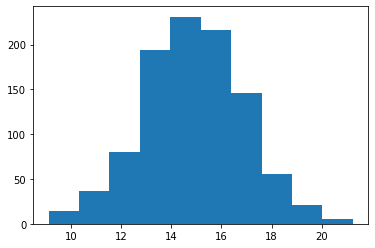

In [3]:
plt.hist(x)

(array([  9.,  36.,  95., 198., 237., 219., 121.,  61.,  20.,   4.]),
 array([15.53012422, 18.59175331, 21.6533824 , 24.71501148, 27.77664057,
        30.83826965, 33.89989874, 36.96152783, 40.02315691, 43.084786  ,
        46.14641509]),
 <BarContainer object of 10 artists>)

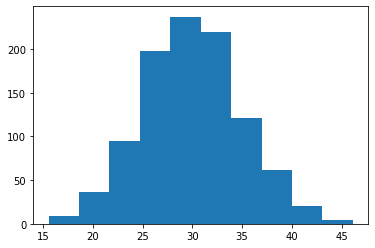

In [4]:
plt.hist(y)

In [5]:
# Use error propagation formula
u_mean = 15/30
u_err = abs(u_mean)*(4/225+25/900)**0.5

print('Mean and error of u from error propagation = ',u_mean,' +- ',u_err)

Mean and error of u from error propagation =  0.5  +-  0.10671873729054748


Mean and error of u from simulation =  0.5109895099250634  +-  0.11121691239405156


(array([ 76., 245., 335., 197.,  98.,  28.,  17.,   1.,   2.,   1.]),
 array([0.28314132, 0.36833742, 0.45353353, 0.53872963, 0.62392574,
        0.70912184, 0.79431794, 0.87951405, 0.96471015, 1.04990626,
        1.13510236]),
 <BarContainer object of 10 artists>)

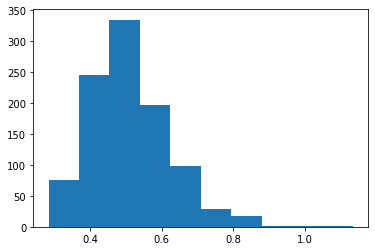

In [6]:
# Calculate values with simulation data
u = x/y

u_mean = np.mean(u)
u_err = np.std(u)
print('Mean and error of u from simulation = ',u_mean,' +- ',u_err)

# Simulated distribution of u
plt.hist(u)

Both results gave the similar values. Good!

# Example 2

$$ u = \sqrt{x^2+y^2} $$

From error propagation formula: $$ \sigma_u = \sqrt{\frac{x^2\sigma_x^2+y^2\sigma_y^2}{x^2+y^2}}$$

In [7]:
# Sample x, y from normal distribution
x = np.random.normal(1, 3, 1000)
y = np.random.normal(2, 5, 1000)

(array([  3.,   9.,  46., 121., 229., 256., 199.,  94.,  37.,   6.]),
 array([-9.78167482, -7.78080635, -5.77993787, -3.77906939, -1.77820091,
         0.22266757,  2.22353605,  4.22440452,  6.225273  ,  8.22614148,
        10.22700996]),
 <BarContainer object of 10 artists>)

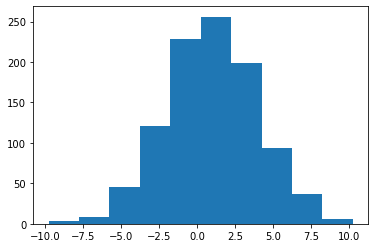

In [8]:
plt.hist(x)

(array([  8.,  41.,  86., 219., 239., 226., 117.,  50.,  12.,   2.]),
 array([-1.31814947e+01, -9.88575204e+00, -6.59000939e+00, -3.29426675e+00,
         1.47590016e-03,  3.29721855e+00,  6.59296120e+00,  9.88870384e+00,
         1.31844465e+01,  1.64801891e+01,  1.97759318e+01]),
 <BarContainer object of 10 artists>)

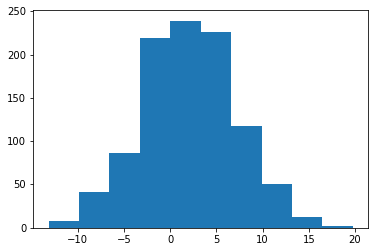

In [9]:
plt.hist(y)

In [10]:
# Use error propagation formula
u_mean = (1**2+2**2)**0.5
u_err = ((3**2+10**2)/(1**2+2**2))**0.5

print('Mean and error of u from error propagation = ',u_mean,' +- ',u_err)

Mean and error of u from error propagation =  2.23606797749979  +-  4.669047011971501


## Note
The result doesn't make sense because $u$ is positively defined, but the error covers negative range.
The reason is that the error propagation formula doesn't work in this case.
That's because the Taylor expansion is not valid when $x$ and $y$ are around 0, which is included in this case (see histograms above).
For such case, you assign uncertainty based on the simulated distribution as below.

Mean and error of u from simulation (this value should be used) =  5.4805297630123055  +-  3.102860394738105


(array([113., 260., 240., 201.,  90.,  55.,  31.,   7.,   1.,   2.]),
 array([ 0.09837221,  2.06971148,  4.04105076,  6.01239003,  7.9837293 ,
         9.95506858, 11.92640785, 13.89774712, 15.8690864 , 17.84042567,
        19.81176494]),
 <BarContainer object of 10 artists>)

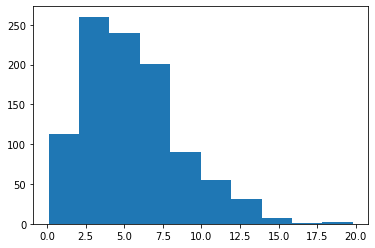

In [12]:
# Calculate values with simulation data
u = (x**2+y**2)**0.5

u_mean = np.mean(u)
u_err = np.std(u)
print('Mean and error of u from simulation (this value should be used) = ',u_mean,' +- ',u_err)

# Simulated distribution of u
plt.hist(u)